In [2]:
from plotly.subplots import make_subplots

import plotly.graph_objects as go
import plotly.express as px

from IPython.display import display

import pandas as pd
import numpy as np
import json
import os

import DataMiner

pd.options.plotting.backend = "plotly"
from IPython.display import HTML

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler

from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
dbm = DataMiner.DataBaseManager()

cursor = dbm.get_all_base('Txt_features')
df_base = pd.DataFrame()

for document in cursor:
    df_base = df_base.append(document, ignore_index=True)
    

TypeError: get_all_base() takes 1 positional argument but 2 were given

In [3]:
df = df_base.copy()

In [4]:
df = df[df.result != -1].reset_index(drop = True)
irrelevants = set()

In [5]:
std_columns_convert = set()
modalidade_columns = set()

In [6]:
columns_drop = ['_id',
'cnpj',
'result',
'txt_file']

##  Consultas recentes

In [7]:
columns = df.columns
columns = columns[columns.str.contains('1_')]
columns

Index(['1_FREQUENCIA_CONSULTAS', '1_FREQUENCIA_CONSULTAS_FACTORING',
       '1_TOTAL_FACTORINGS'],
      dtype='object')

In [8]:
df[columns].describe()

,1_FREQUENCIA_CONSULTAS,1_FREQUENCIA_CONSULTAS_FACTORING,1_TOTAL_FACTORINGS
count,868.000000,269.000000,868.000000
mean,5.270737,9.159851,1.153226
std,6.541799,16.740795,1.100813
min,0.000000,0.000000,0.000000
25%,2.000000,1.000000,0.000000
50%,3.000000,4.000000,1.000000
75%,6.000000,10.000000,2.000000
max,54.000000,146.000000,6.000000


In [9]:
def frequency_type(x):
    try:
        if x <= 7:
            return 1
        elif (x > 7) and (x <= 15):
            return 2
        elif x > 15:
            return 3
        
    except:
        return 0

In [10]:
df['1_FREQUENCIA_CONSULTAS'] = df['1_FREQUENCIA_CONSULTAS'].apply(frequency_type)
df['1_FREQUENCIA_CONSULTAS_FACTORING'] = df['1_FREQUENCIA_CONSULTAS_FACTORING'].apply(frequency_type)

df['1_FREQUENCIA_CONSULTAS'] = df['1_FREQUENCIA_CONSULTAS'].fillna(0)
df['1_FREQUENCIA_CONSULTAS_FACTORING'] = df['1_FREQUENCIA_CONSULTAS_FACTORING'].fillna(0)
df['1_TOTAL_FACTORINGS'] = df['1_TOTAL_FACTORINGS'].fillna(0)

In [11]:
for i in columns:
    print(i)
    print('TOTAL NULL: ', df[i].isnull().sum())
    
    print(df[i].value_counts())
    print('')
    
    

1_FREQUENCIA_CONSULTAS
TOTAL NULL:  0
1.0    700
2.0    114
3.0     54
0.0      4
Name: 1_FREQUENCIA_CONSULTAS, dtype: int64

1_FREQUENCIA_CONSULTAS_FACTORING
TOTAL NULL:  0
0.0    603
1.0    179
2.0     55
3.0     35
Name: 1_FREQUENCIA_CONSULTAS_FACTORING, dtype: int64

1_TOTAL_FACTORINGS
TOTAL NULL:  0
1.0    297
0.0    293
2.0    175
3.0     80
4.0     22
5.0      4
6.0      1
Name: 1_TOTAL_FACTORINGS, dtype: int64



## Registro de Consultas

In [12]:
columns = df.columns
columns = columns[columns.str.contains('2_')]
columns

Index(['2_ACIMA_MEDIA', '2_POSSUI_CRESCIMENTO', '2_TENDENCIA_CRESCIMENTO',
       '2_TOTAL_CONSULTAS', '2_TOTAL_CONSULTAS_PONDERADA'],
      dtype='object')

In [13]:
for i in columns:
    print(i)
    print('TOTAL NULL: ', df[i].isnull().sum())
    
    print(df[i].value_counts())
    print('')

2_ACIMA_MEDIA
TOTAL NULL:  0
1.0    525
0.0    347
Name: 2_ACIMA_MEDIA, dtype: int64

2_POSSUI_CRESCIMENTO
TOTAL NULL:  0
0.0    548
1.0    324
Name: 2_POSSUI_CRESCIMENTO, dtype: int64

2_TENDENCIA_CRESCIMENTO
TOTAL NULL:  0
0.0    596
1.0    276
Name: 2_TENDENCIA_CRESCIMENTO, dtype: int64

2_TOTAL_CONSULTAS
TOTAL NULL:  0
568.0     4
570.0     4
530.0     4
1472.0    3
160.0     3
         ..
373.0     1
482.0     1
1224.0    1
201.0     1
1199.0    1
Name: 2_TOTAL_CONSULTAS, Length: 705, dtype: int64

2_TOTAL_CONSULTAS_PONDERADA
TOTAL NULL:  0
67.0      10
96.0       9
26.0       9
51.0       8
29.0       8
          ..
69.0       1
574.0      1
1812.0     1
384.0      1
919.0      1
Name: 2_TOTAL_CONSULTAS_PONDERADA, Length: 358, dtype: int64



In [14]:
df[columns].describe()

,2_ACIMA_MEDIA,2_POSSUI_CRESCIMENTO,2_TENDENCIA_CRESCIMENTO,2_TOTAL_CONSULTAS,2_TOTAL_CONSULTAS_PONDERADA
count,872.000000,872.000000,872.000000,872.000000,872.000000
mean,0.602064,0.371560,0.316514,1109.376147,170.487385
std,0.489753,0.483499,0.465383,1067.169882,165.627388
min,0.000000,0.000000,0.000000,8.000000,1.000000
25%,0.000000,0.000000,0.000000,432.750000,66.000000
50%,1.000000,0.000000,0.000000,842.000000,127.500000
75%,1.000000,1.000000,1.000000,1417.500000,216.000000
max,1.000000,1.000000,1.000000,11468.000000,1812.000000


In [15]:
# import plotly.express as px
# fig = go.Figure()
# fig.add_trace(go.Box(y=df['2_TOTAL_CONSULTAS_PONDERADA'], quartilemethod="linear", name="2_TOTAL_CONSULTAS_PONDERADA"))
# fig.add_trace(go.Box(y=df['2_TOTAL_CONSULTAS'], quartilemethod="linear", name="2_TOTAL_CONSULTAS"))

# fig.show()

In [16]:
df = df.drop(columns = ['2_TOTAL_CONSULTAS'])

In [17]:
std_columns_convert.add('2_TOTAL_CONSULTAS_PONDERADA')

## REFIN

In [18]:
columns = df.columns
columns = columns[columns.str.contains('3_')]
columns

Index(['3_FREQUENCIA_DEBITO', '3_MODALIDADE_MAIS_PRESENTE',
       '3_QUANTIDADE_DEBITO', '3_ULTIMA_MODALIDADE', '3_VALOR_DEBITO'],
      dtype='object')

In [19]:
for i in columns:
    print(i)
    print('TOTAL NULL: ', df[i].isnull().sum())
    
    print(df[i].value_counts())
    print('')

3_FREQUENCIA_DEBITO
TOTAL NULL:  724
31.0    8
0.0     4
9.0     4
17.0    4
15.0    4
       ..
1.0     1
98.0    1
33.0    1
36.0    1
66.0    1
Name: 3_FREQUENCIA_DEBITO, Length: 92, dtype: int64

3_MODALIDADE_MAIS_PRESENTE
TOTAL NULL:  690
FINANCIAMENT    61
OUTRAS OPER     52
TIT.DESCONTA    17
EMPRES.CONTA    15
EMPRESTIMO      12
REPASSES        11
ADIANT.CONTA     4
OUTRAS OPERA     3
CRED.CARTAO      2
OPER.CAMBIO      2
LEASING          2
OPERACOES DE     1
Name: 3_MODALIDADE_MAIS_PRESENTE, dtype: int64

3_QUANTIDADE_DEBITO
TOTAL NULL:  690
5.0    98
1.0    34
2.0    22
4.0    15
3.0    13
Name: 3_QUANTIDADE_DEBITO, dtype: int64

3_ULTIMA_MODALIDADE
TOTAL NULL:  690
FINANCIAMENT    63
OUTRAS OPER     33
EMPRES.CONTA    26
ADIANT.CONTA    17
EMPRESTIMO      15
CRED.CARTAO     11
REPASSES         7
TIT.DESCONTA     6
OPER.CAMBIO      2
CONS VEICULO     1
CREDITO E FI     1
Name: 3_ULTIMA_MODALIDADE, dtype: int64

3_VALOR_DEBITO
TOTAL NULL:  690
877567.0     1
1346195.0    1
397

In [20]:
df['3_FREQUENCIA_DEBITO'] = df['3_FREQUENCIA_DEBITO'].apply(frequency_type)

df['3_FREQUENCIA_DEBITO'] = df['3_FREQUENCIA_DEBITO'].fillna(0)
df['3_VALOR_DEBITO'] = df['3_VALOR_DEBITO'].fillna(0)
df['3_QUANTIDADE_DEBITO'] = df['3_QUANTIDADE_DEBITO'].fillna(0)



In [21]:
modalidade_columns.add('3_ULTIMA_MODALIDADE')
modalidade_columns.add('3_MODALIDADE_MAIS_PRESENTE')

In [22]:
df[columns].describe()

,3_FREQUENCIA_DEBITO,3_QUANTIDADE_DEBITO,3_VALOR_DEBITO
count,872.000000,872.000000,8.720000e+02
mean,0.446101,0.764908,1.986799e+05
std,1.026328,1.666447,1.127365e+06
min,0.000000,0.000000,0.000000e+00
25%,0.000000,0.000000,0.000000e+00
50%,0.000000,0.000000,0.000000e+00
75%,0.000000,0.000000,0.000000e+00
max,3.000000,5.000000,2.114964e+07


In [23]:
std_columns_convert.add('3_VALOR_DEBITO')

## PEFIN

In [24]:
columns = df.columns
columns = columns[columns.str.contains('4_')]
columns

Index(['4_FREQUENCIA_DEBITO', '4_MODALIDADE_MAIS_PRESENTE',
       '4_QUANTIDADE_DEBITO', '4_TOTAL_FACTORINGS_DEBITO',
       '4_ULTIMA_MODALIDADE', '4_VALOR_DEBITO'],
      dtype='object')

In [25]:
for i in columns:
    print(i)
    print('TOTAL NULL: ', df[i].isnull().sum())
    
    print(df[i].value_counts())
    print('')

4_FREQUENCIA_DEBITO
TOTAL NULL:  682
5.0      11
8.0       8
0.0       8
16.0      6
6.0       6
         ..
50.0      1
63.0      1
125.0     1
46.0      1
958.0     1
Name: 4_FREQUENCIA_DEBITO, Length: 100, dtype: int64

4_MODALIDADE_MAIS_PRESENTE
TOTAL NULL:  625
OUTRAS OPER     84
DUPLICATA       50
NOTA FISCAL     44
TIT.DESCONTA    40
EMPRESTIMO       7
VENDA MERCAD     6
SERV TELEFON     5
ALUGUEL          3
SEGURO SAUDE     2
ADIANT.CONTA     1
CONFISS DIV      1
ARRECADADOR      1
RENEG DIVIDA     1
ENERGIA ELET     1
SEGURO RISCO     1
Name: 4_MODALIDADE_MAIS_PRESENTE, dtype: int64

4_QUANTIDADE_DEBITO
TOTAL NULL:  625
5.0    136
1.0     57
2.0     29
3.0     13
4.0     12
Name: 4_QUANTIDADE_DEBITO, dtype: int64

4_TOTAL_FACTORINGS_DEBITO
TOTAL NULL:  625
0.0    237
1.0      8
5.0      1
3.0      1
Name: 4_TOTAL_FACTORINGS_DEBITO, dtype: int64

4_ULTIMA_MODALIDADE
TOTAL NULL:  625
DUPLICATA       88
OUTRAS OPER     58
NOTA FISCAL     46
TIT.DESCONTA    23
EMPRESTIMO       7
A

In [26]:
df['4_FREQUENCIA_DEBITO'] = df['4_FREQUENCIA_DEBITO'].apply(frequency_type)

df['4_FREQUENCIA_DEBITO'] = df['4_FREQUENCIA_DEBITO'].fillna(0)
df['4_VALOR_DEBITO'] = df['4_VALOR_DEBITO'].fillna(0)
df['4_QUANTIDADE_DEBITO'] = df['4_QUANTIDADE_DEBITO'].fillna(0)
df['4_TOTAL_FACTORINGS_DEBITO'] = df['4_TOTAL_FACTORINGS_DEBITO'].fillna(0)


In [27]:
modalidade_columns.add('4_ULTIMA_MODALIDADE')
modalidade_columns.add('4_MODALIDADE_MAIS_PRESENTE')

std_columns_convert.add('4_VALOR_DEBITO')

## DIVIDA VENCIDA

In [28]:
columns = df.columns
columns = columns[columns.str.contains('5_')]
columns

Index(['5_FREQUENCIA_DEBITO', '5_MODALIDADE_MAIS_PRESENTE',
       '5_QUANTIDADE_DEBITO', '5_ULTIMA_MODALIDADE', '5_VALOR_DEBITO'],
      dtype='object')

In [29]:
df['5_FREQUENCIA_DEBITO'] = df['5_FREQUENCIA_DEBITO'].apply(frequency_type)

df['5_FREQUENCIA_DEBITO'] = df['5_FREQUENCIA_DEBITO'].fillna(0)
df['5_VALOR_DEBITO'] = df['5_VALOR_DEBITO'].fillna(0)
df['5_QUANTIDADE_DEBITO'] = df['5_QUANTIDADE_DEBITO'].fillna(0)

In [30]:
modalidade_columns.add('5_ULTIMA_MODALIDADE')
modalidade_columns.add('5_MODALIDADE_MAIS_PRESENTE')

std_columns_convert.add('5_VALOR_DEBITO')

## Historico de Pagamentos

In [31]:
columns = df.columns
columns = columns[columns.str.contains('6_')]
columns

Index(['6_PAGAMENTO_PERCENT_+60', '6_PAGAMENTO_PERCENT_15',
       '6_PAGAMENTO_PERCENT_30', '6_PAGAMENTO_PERCENT_60',
       '6_PAGAMENTO_PERCENT_A_VISTA', '6_PAGAMENTO_TEND_CRES_+60',
       '6_PAGAMENTO_TEND_CRES_15', '6_PAGAMENTO_TEND_CRES_30',
       '6_PAGAMENTO_TEND_CRES_60', '6_PAGAMENTO_TEND_CRES_A_VISTA',
       '6_PAGAMENTO_VALOR_+60', '6_PAGAMENTO_VALOR_15', '6_PAGAMENTO_VALOR_30',
       '6_PAGAMENTO_VALOR_60', '6_PAGAMENTO_VALOR_A_VISTA',
       '6_PRESENCA_PAGAMENTOS', '6_TOTAL_PAGAMENTOS'],
      dtype='object')

In [32]:
for i in columns:
    print(i)
    print('TOTAL NULL: ', df[i].isnull().sum())
    
    print(df[i].value_counts())
    print('')

6_PAGAMENTO_PERCENT_+60
TOTAL NULL:  257
0.0     389
12.0     63
13.0     28
18.0     20
25.0     16
5.0      10
23.0      9
31.0      8
20.0      8
33.0      6
11.0      6
16.0      5
14.0      5
6.0       4
46.0      3
28.0      3
43.0      3
26.0      3
75.0      2
50.0      2
15.0      2
66.0      2
17.0      2
7.0       2
87.0      2
22.0      1
81.0      1
10.0      1
35.0      1
40.0      1
8.0       1
37.0      1
36.0      1
29.0      1
68.0      1
53.0      1
58.0      1
Name: 6_PAGAMENTO_PERCENT_+60, dtype: int64

6_PAGAMENTO_PERCENT_15
TOTAL NULL:  257
6.0      129
18.0      69
0.0       42
25.0      40
31.0      32
20.0      28
7.0       25
33.0      21
56.0      14
50.0      14
37.0      13
26.0      13
43.0      12
8.0        9
12.0       8
68.0       8
23.0       8
46.0       8
62.0       8
11.0       7
9.0        6
73.0       5
21.0       5
100.0      5
47.0       5
60.0       5
75.0       5
29.0       5
10.0       5
40.0       5
66.0       4
14.0       4
27.0       4
3

In [33]:
df['6_PAGAMENTO_PERCENT_+60'] = df['6_PAGAMENTO_PERCENT_+60'].fillna(0)
df['6_PAGAMENTO_PERCENT_15'] = df['6_PAGAMENTO_PERCENT_15'].fillna(0)
df['6_PAGAMENTO_PERCENT_30'] = df['6_PAGAMENTO_PERCENT_30'].fillna(0)
df['6_PAGAMENTO_PERCENT_60'] = df['6_PAGAMENTO_PERCENT_60'].fillna(0)
df['6_PAGAMENTO_PERCENT_A_VISTA'] = df['6_PAGAMENTO_PERCENT_A_VISTA'].fillna(0)
df['6_PAGAMENTO_VALOR_+60'] = df['6_PAGAMENTO_VALOR_+60'].fillna(0)
df['6_PAGAMENTO_VALOR_15'] = df['6_PAGAMENTO_VALOR_15'].fillna(0)
df['6_PAGAMENTO_VALOR_30'] = df['6_PAGAMENTO_VALOR_30'].fillna(0)
df['6_PAGAMENTO_VALOR_60'] = df['6_PAGAMENTO_VALOR_60'].fillna(0)
df['6_PAGAMENTO_VALOR_A_VISTA'] = df['6_PAGAMENTO_VALOR_A_VISTA'].fillna(0)
df['6_TOTAL_PAGAMENTOS'] = df['6_TOTAL_PAGAMENTOS'].fillna(0)

df['6_PAGAMENTO_TEND_CRES_+60'] = df['6_PAGAMENTO_TEND_CRES_+60'].fillna(0)
df['6_PAGAMENTO_TEND_CRES_15'] = df['6_PAGAMENTO_TEND_CRES_15'].fillna(0)
df['6_PAGAMENTO_TEND_CRES_30'] = df['6_PAGAMENTO_TEND_CRES_30'].fillna(0)
df['6_PAGAMENTO_TEND_CRES_60'] = df['6_PAGAMENTO_TEND_CRES_60'].fillna(0)
df['6_PAGAMENTO_TEND_CRES_A_VISTA'] = df['6_PAGAMENTO_TEND_CRES_A_VISTA'].fillna(0)


df['6_PRESENCA_PAGAMENTOS'] = df['6_PRESENCA_PAGAMENTOS'].fillna(0)

In [34]:
std_columns_convert.add('6_PAGAMENTO_PERCENT_+60')
std_columns_convert.add('6_PAGAMENTO_PERCENT_15')
std_columns_convert.add('6_PAGAMENTO_PERCENT_30')
std_columns_convert.add('6_PAGAMENTO_PERCENT_60')
std_columns_convert.add('6_PAGAMENTO_PERCENT_A_VISTA')
std_columns_convert.add('6_PAGAMENTO_VALOR_+60')
std_columns_convert.add('6_PAGAMENTO_VALOR_15')
std_columns_convert.add('6_PAGAMENTO_VALOR_30')
std_columns_convert.add('6_PAGAMENTO_VALOR_60')
std_columns_convert.add('6_PAGAMENTO_VALOR_A_VISTA')
std_columns_convert.add('6_TOTAL_PAGAMENTOS')

# df = df.drop(columns = ['6_PAGAMENTO_TEND_CRES_+60',
#        '6_PAGAMENTO_TEND_CRES_15', '6_PAGAMENTO_TEND_CRES_30',
#        '6_PAGAMENTO_TEND_CRES_60', '6_PAGAMENTO_TEND_CRES_A_VISTA'])

## Evolução de Compromissos

In [35]:
columns = df.columns
columns = columns[columns.str.contains('7_')]
columns

Index(['7_POSSUI_CRESCIMENTO', '7_TEND_CRESCIMENTO_A_VENCER',
       '7_TEND_CRESCIMENTO_TOTAL', '7_TEND_CRESCIMENTO_VENCIDOS',
       '7_TOTAL_COMMITMENTS', '7_VALOR_TOTAL_A_VENCER', '7_VALOR_TOTAL_TOTAL',
       '7_VALOR_TOTAL_VENCIDOS'],
      dtype='object')

In [36]:
for i in columns:
    print(i)
    print('TOTAL NULL: ', df[i].isnull().sum())
    
    print(df[i].value_counts())
    print('')

7_POSSUI_CRESCIMENTO
TOTAL NULL:  468
4.6    278
4.4     35
2.8     12
2.4     10
3.6     10
4.2      8
3.4      8
4.0      8
3.0      8
3.2      7
3.8      7
2.6      5
1.6      5
0.8      3
Name: 7_POSSUI_CRESCIMENTO, dtype: int64

7_TEND_CRESCIMENTO_A_VENCER
TOTAL NULL:  471
0.0    254
1.0    147
Name: 7_TEND_CRESCIMENTO_A_VENCER, dtype: int64

7_TEND_CRESCIMENTO_TOTAL
TOTAL NULL:  471
1.0    204
0.0    197
Name: 7_TEND_CRESCIMENTO_TOTAL, dtype: int64

7_TEND_CRESCIMENTO_VENCIDOS
TOTAL NULL:  471
0.0    220
1.0    181
Name: 7_TEND_CRESCIMENTO_VENCIDOS, dtype: int64

7_TOTAL_COMMITMENTS
TOTAL NULL:  468
14.0    278
13.0     35
5.0      12
9.0      10
3.0      10
11.0      8
12.0      8
8.0       8
6.0       8
7.0       7
10.0      7
2.0       5
4.0       5
1.0       3
Name: 7_TOTAL_COMMITMENTS, dtype: int64

7_VALOR_TOTAL_A_VENCER
TOTAL NULL:  468
0.000         27
3200.000       2
2800.000       2
129796.605     1
5615.288       1
              ..
9119.701       1
4703.657       1
23

In [37]:
df['7_TEND_CRESCIMENTO_A_VENCER'] = df['7_TEND_CRESCIMENTO_A_VENCER'].fillna(-1)
df['7_TEND_CRESCIMENTO_TOTAL'] = df['7_TEND_CRESCIMENTO_TOTAL'].fillna(-1)
df['7_TEND_CRESCIMENTO_VENCIDOS'] = df['7_TEND_CRESCIMENTO_VENCIDOS'].fillna(-1)

df['7_TOTAL_COMMITMENTS'] = df['7_TOTAL_COMMITMENTS'].fillna(0)
df['7_VALOR_TOTAL_A_VENCER'] = df['7_VALOR_TOTAL_A_VENCER'].fillna(0)
df['7_VALOR_TOTAL_VENCIDOS'] = df['7_VALOR_TOTAL_VENCIDOS'].fillna(0)

In [38]:
df['7_VALOR_TOTAL_TOTAL'] = df['7_VALOR_TOTAL_TOTAL'].fillna(0)
df['7_POSSUI_CRESCIMENTO'] = df['7_POSSUI_CRESCIMENTO'].fillna(0)
              

In [39]:
std_columns_convert.add('7_TOTAL_COMMITMENTS')
std_columns_convert.add('7_VALOR_TOTAL_A_VENCER')
std_columns_convert.add('7_VALOR_TOTAL_VENCIDOS')

## Falencia

In [40]:
columns = df.columns
columns = columns[columns.str.contains('8_')]
columns

Index(['8_TOTAL_FALENCIA_REQ', '8_TOTAL_FALENCIA__CONC'], dtype='object')

In [41]:
for i in columns:
    print(i)
    print('TOTAL NULL: ', df[i].isnull().sum())
    
    print(df[i].value_counts())
    print('')

8_TOTAL_FALENCIA_REQ
TOTAL NULL:  824
1.0    45
0.0     2
3.0     1
Name: 8_TOTAL_FALENCIA_REQ, dtype: int64

8_TOTAL_FALENCIA__CONC
TOTAL NULL:  824
0.0    35
1.0    13
Name: 8_TOTAL_FALENCIA__CONC, dtype: int64



In [42]:
df.loc[df['8_TOTAL_FALENCIA_REQ'] > 0, '8_TOTAL_FALENCIA_REQ'] = 1
df.loc[df['8_TOTAL_FALENCIA__CONC'] > 0, '8_TOTAL_FALENCIA__CONC'] = 1

In [43]:
df['8_TOTAL_FALENCIA_REQ'] = df['8_TOTAL_FALENCIA_REQ'].fillna(0)
df['8_TOTAL_FALENCIA__CONC'] = df['8_TOTAL_FALENCIA__CONC'].fillna(0)

## Ação Judicial

In [44]:
columns = df.columns
columns = columns[columns.str.contains('9_')]
columns

Index(['9_FREQUENCIA_ACAO_JUDICIAL', '9_NATUREZA_MAIS_PRESENTE',
       '9_TOTAL_ACAO_JUDICIAL', '9_VALOR_TOTAL'],
      dtype='object')

In [45]:
for i in columns:
    print(i)
    print('TOTAL NULL: ', df[i].isnull().sum())
    
    print(df[i].value_counts())
    print('')

9_FREQUENCIA_ACAO_JUDICIAL
TOTAL NULL:  824
0.0      3
90.0     2
34.0     2
88.0     2
103.0    2
903.0    1
4.0      1
12.0     1
19.0     1
118.0    1
81.0     1
412.0    1
228.0    1
64.0     1
25.0     1
858.0    1
1.0      1
96.0     1
284.0    1
104.0    1
102.0    1
336.0    1
45.0     1
37.0     1
299.0    1
141.0    1
245.0    1
203.0    1
163.0    1
187.0    1
189.0    1
258.0    1
718.0    1
199.0    1
595.0    1
327.0    1
365.0    1
553.0    1
79.0     1
38.0     1
11.0     1
249.0    1
Name: 9_FREQUENCIA_ACAO_JUDICIAL, dtype: int64

9_NATUREZA_MAIS_PRESENTE
TOTAL NULL:  770
EXECUCAO            52
FISCAL ESTADUAL     25
FISCAL MUNICIPAL    11
EXECUCAO - JE        5
EXC JUD TRAB         5
FISCAL FEDERAL       4
Name: 9_NATUREZA_MAIS_PRESENTE, dtype: int64

9_TOTAL_ACAO_JUDICIAL
TOTAL NULL:  770
1.0    54
2.0    16
5.0    14
3.0    11
4.0     7
Name: 9_TOTAL_ACAO_JUDICIAL, dtype: int64

9_VALOR_TOTAL
TOTAL NULL:  770
0.0           69
247099.0       1
55843038.0     1
349929

In [46]:
df['9_FREQUENCIA_ACAO_JUDICIAL'] = df['9_FREQUENCIA_ACAO_JUDICIAL'].apply(frequency_type)


df['9_FREQUENCIA_ACAO_JUDICIAL'] = df['9_FREQUENCIA_ACAO_JUDICIAL'].fillna(0)
df['9_TOTAL_ACAO_JUDICIAL'] = df['9_TOTAL_ACAO_JUDICIAL'].fillna(0)
df['9_VALOR_TOTAL'] = df['9_VALOR_TOTAL'].fillna(0)

In [47]:
std_columns_convert.add('9_TOTAL_ACAO_JUDICIAL')
std_columns_convert.add('9_VALOR_TOTAL')
modalidade_columns.add('9_NATUREZA_MAIS_PRESENTE')

## Protesto

In [48]:
columns = df.columns
columns = columns[columns.str.contains('10_')]
columns

Index(['10_FREQUENCIA_PROTESTO', '10_MEDIA_VALOR', '10_STD_VALOR',
       '10_TOTAL_PROTESTOS'],
      dtype='object')

In [49]:
for i in columns:
    print(i)
    print('TOTAL NULL: ', df[i].isnull().sum())
    
    print(df[i].value_counts())
    print('')

10_FREQUENCIA_PROTESTO
TOTAL NULL:  624
0.0      21
1.0      18
7.0      12
5.0      11
2.0      10
         ..
74.0      1
108.0     1
91.0      1
45.0      1
265.0     1
Name: 10_FREQUENCIA_PROTESTO, Length: 94, dtype: int64

10_MEDIA_VALOR
TOTAL NULL:  596
542.666667       1
578883.500000    1
287833.400000    1
1402.800000      1
1305.400000      1
                ..
3526.600000      1
129506.600000    1
938.200000       1
78899.000000     1
3284.000000      1
Name: 10_MEDIA_VALOR, Length: 276, dtype: int64

10_STD_VALOR
TOTAL NULL:  624
0.000000        2
614.921784      1
466.920015      1
40949.598515    1
1942.340418     1
               ..
4901.380040     1
417.107660      1
8714.566656     1
8698.329455     1
3173.935648     1
Name: 10_STD_VALOR, Length: 247, dtype: int64

10_TOTAL_PROTESTOS
TOTAL NULL:  596
5.0    207
1.0     28
3.0     16
2.0     14
4.0     11
Name: 10_TOTAL_PROTESTOS, dtype: int64



In [50]:
df['10_FREQUENCIA_PROTESTO'] = df['10_FREQUENCIA_PROTESTO'].apply(frequency_type)

df['10_FREQUENCIA_PROTESTO'] = df['10_FREQUENCIA_PROTESTO'].fillna(0)
df['10_MEDIA_VALOR'] = df['10_MEDIA_VALOR'].fillna(0)
df['10_STD_VALOR'] = df['10_STD_VALOR'].fillna(0)
df['10_TOTAL_PROTESTOS'] = df['10_TOTAL_PROTESTOS'].fillna(0)



In [51]:
std_columns_convert.add('10_MEDIA_VALOR')
std_columns_convert.add('10_STD_VALOR')


# Transformações 

In [52]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

def scaleColumns(df, cols_to_scale):
    scalers = {}
    
    
    for col in cols_to_scale:
        scaler = StandardScaler()
        scaler.fit(df[[col]])
        
        df[col] = scaler.transform(df[[col]])
        
        scalers[col] = scaler
    return df, scalers

In [53]:
# df_f, scalers = scaleColumns(df, std_columns_convert)

In [54]:
def convert_modalidades(df, modalidade_columns):
    modalidade_columns = list(modalidade_columns)
    values = set()
    for a in modalidade_columns:
        for c in df[a].unique():
            if type(c) == type('x'):
                values.add(c)


    dict_str_value = {}
    j = 1
    for c in values:
        dict_str_value[c] = j
        j+=1

    df[modalidade_columns] = df[modalidade_columns].replace(dict_str_value).fillna(0)
    
    return df, dict_str_value


In [55]:
df_f, dict_modalidades = convert_modalidades(df, modalidade_columns)

In [56]:
df = df_f.drop(columns = ['ACAO JUDICIAL',                                           
'DIVIDA VENCIDA',                                          
'EVOLUCAO DE COMPROMISSOS - VISAO CEDENTE (VALORES EM R$)',
'FALENCIA',                                                
'PEFIN',                                                   
'HISTORICO DE PAGAMENTOS NO MERCADO (VALORES EM R$)',       
'CINCO ULTIMAS CONSULTAS',                                 
'PROTESTO',                                                
'REFIN'])

In [57]:
df_aux = df.copy()
# df_aux = df_aux.drop(columns = ['_id','cnpj','txt_file'])
# columns_list = set(df_aux.sample(n = 9, axis='columns').columns)
# columns_list.add('result')

In [58]:
df_scaled = df.copy()
scaler = StandardScaler()

df_scaled = df_scaled.drop(columns = ['_id','cnpj','txt_file','result'])

df_scaled=pd.DataFrame(scaler.fit_transform(df_scaled), columns=df_scaled.columns)
df_scaled.head()

,10_FREQUENCIA_PROTESTO,10_MEDIA_VALOR,10_STD_VALOR,10_TOTAL_PROTESTOS,1_FREQUENCIA_CONSULTAS,1_FREQUENCIA_CONSULTAS_FACTORING,1_TOTAL_FACTORINGS,2_ACIMA_MEDIA,2_POSSUI_CRESCIMENTO,2_TENDENCIA_CRESCIMENTO,...,7_TOTAL_COMMITMENTS,7_VALOR_TOTAL_A_VENCER,7_VALOR_TOTAL_TOTAL,7_VALOR_TOTAL_VENCIDOS,9_FREQUENCIA_ACAO_JUDICIAL,9_NATUREZA_MAIS_PRESENTE,9_TOTAL_ACAO_JUDICIAL,9_VALOR_TOTAL,8_TOTAL_FALENCIA_REQ,8_TOTAL_FALENCIA__CONC
0,1.292985,0.728488,0.443985,1.706635,-0.441578,-0.576322,-0.134436,-1.230028,1.300522,1.469497,...,-0.872502,-0.282122,-0.525467,-0.172303,-0.234936,-0.3059,-0.293942,-0.066266,-0.235987,-0.12302
1,-0.561428,-0.126741,-0.116783,-0.635489,3.091045,-0.576322,-1.043184,0.812990,-0.768922,1.469497,...,-0.872502,-0.282122,-0.525467,-0.172303,-0.234936,-0.3059,-0.293942,-0.066266,-0.235987,-0.12302
2,-0.561428,-0.126741,-0.116783,-0.635489,-0.441578,0.699192,2.591808,0.812990,-0.768922,1.469497,...,-0.872502,-0.282122,-0.525467,-0.172303,-0.234936,-0.3059,-0.293942,-0.066266,-0.235987,-0.12302
3,2.220191,-0.100672,-0.091254,1.706635,1.324734,-0.576322,-0.134436,-1.230028,-0.768922,-0.680505,...,1.268503,0.026103,2.927892,-0.107004,-0.234936,-0.3059,-0.293942,-0.066266,-0.235987,-0.12302
4,0.365779,-0.111654,-0.099336,1.706635,-0.441578,0.699192,0.774312,0.812990,-0.768922,-0.680505,...,1.268503,-0.057883,4.452384,0.055834,-0.234936,-0.3059,-0.293942,-0.066266,-0.235987,-0.12302


# WOE and Info Value

In [59]:
import pandas.core.algorithms as algos
from pandas import Series
import scipy.stats.stats as stats
import re
import traceback
import string

max_bin = 20
force_bin = 3

# define a binning function
def mono_bin(Y, X, n = max_bin):
    
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]
    r = 0
    while np.abs(r) < 1:
        try:
            d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.qcut(notmiss.X, n)})
            d2 = d1.groupby('Bucket', as_index=True)
            r, p = stats.spearmanr(d2.mean().X, d2.mean().Y)
            n = n - 1 
        except Exception as e:
            n = n - 1

    if len(d2) == 1:
        n = force_bin         
        bins = algos.quantile(notmiss.X, np.linspace(0, 1, n))
        if len(np.unique(bins)) == 2:
            bins = np.insert(bins, 0, 1)
            bins[1] = bins[1]-(bins[1]/2)
        d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.cut(notmiss.X, np.unique(bins),include_lowest=True)}) 
        d2 = d1.groupby('Bucket', as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["MIN_VALUE"] = d2.min().X
    d3["MAX_VALUE"] = d2.max().X
    d3["COUNT"] = d2.count().Y
    d3["EVENT"] = d2.sum().Y
    d3["NONEVENT"] = d2.count().Y - d2.sum().Y
    d3=d3.reset_index(drop=True)
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]       
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    
    return(d3)

def char_bin(Y, X):
        
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]    
    df2 = notmiss.groupby('X',as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["COUNT"] = df2.count().Y
    d3["MIN_VALUE"] = df2.sum().Y.index
    d3["MAX_VALUE"] = d3["MIN_VALUE"]
    d3["EVENT"] = df2.sum().Y
    d3["NONEVENT"] = df2.count().Y - df2.sum().Y
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]      
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    d3 = d3.reset_index(drop=True)
    
    return(d3)

def data_vars(df1, target):
    
    stack = traceback.extract_stack()
    filename, lineno, function_name, code = stack[-2]
    vars_name = re.compile(r'\((.*?)\).*$').search(code).groups()[0]
    final = (re.findall(r"[\w']+", vars_name))[-1]
    
    x = df1.dtypes.index
    count = -1
    
    for i in x:
        if i.upper() not in (final.upper()):
            if np.issubdtype(df1[i], np.number) and len(Series.unique(df1[i])) > 2:
                conv = mono_bin(target, df1[i])
                conv["VAR_NAME"] = i
                count = count + 1
            else:
                conv = char_bin(target, df1[i])
                conv["VAR_NAME"] = i            
                count = count + 1
                
            if count == 0:
                iv_df = conv
            else:
                iv_df = iv_df.append(conv,ignore_index=True)
    
    iv = pd.DataFrame({'IV':iv_df.groupby('VAR_NAME').IV.max()})
    iv = iv.reset_index()
    return(iv_df,iv)

In [60]:

final_iv, IV = data_vars(df.drop(columns =columns_drop ),df.result)

In [61]:

IV['Best_Preds'] = abs(IV['IV'] - 1)

In [62]:
list(IV.sort_values('Best_Preds')[:10]['VAR_NAME'])

['7_TEND_CRESCIMENTO_TOTAL',
 '7_TOTAL_COMMITMENTS',
 '7_TEND_CRESCIMENTO_VENCIDOS',
 '7_TEND_CRESCIMENTO_A_VENCER',
 '7_POSSUI_CRESCIMENTO',
 '7_VALOR_TOTAL_VENCIDOS',
 '7_VALOR_TOTAL_A_VENCER',
 '7_VALOR_TOTAL_TOTAL',
 '6_PAGAMENTO_PERCENT_A_VISTA',
 '6_PAGAMENTO_PERCENT_30']

In [63]:
IV.sort_values('Best_Preds')

,VAR_NAME,IV,Best_Preds
46,7_TEND_CRESCIMENTO_TOTAL,0.126371,0.873629
48,7_TOTAL_COMMITMENTS,0.126371,0.873629
47,7_TEND_CRESCIMENTO_VENCIDOS,0.126371,0.873629
45,7_TEND_CRESCIMENTO_A_VENCER,0.126371,0.873629
44,7_POSSUI_CRESCIMENTO,0.126371,0.873629
51,7_VALOR_TOTAL_VENCIDOS,0.116118,0.883882
49,7_VALOR_TOTAL_A_VENCER,0.102381,0.897619
50,7_VALOR_TOTAL_TOTAL,0.076725,0.923275
31,6_PAGAMENTO_PERCENT_A_VISTA,0.046639,0.953361
29,6_PAGAMENTO_PERCENT_30,0.040339,0.959661


# Treinamento

In [64]:
df_scaled

,10_FREQUENCIA_PROTESTO,10_MEDIA_VALOR,10_STD_VALOR,10_TOTAL_PROTESTOS,1_FREQUENCIA_CONSULTAS,1_FREQUENCIA_CONSULTAS_FACTORING,1_TOTAL_FACTORINGS,2_ACIMA_MEDIA,2_POSSUI_CRESCIMENTO,2_TENDENCIA_CRESCIMENTO,...,7_TOTAL_COMMITMENTS,7_VALOR_TOTAL_A_VENCER,7_VALOR_TOTAL_TOTAL,7_VALOR_TOTAL_VENCIDOS,9_FREQUENCIA_ACAO_JUDICIAL,9_NATUREZA_MAIS_PRESENTE,9_TOTAL_ACAO_JUDICIAL,9_VALOR_TOTAL,8_TOTAL_FALENCIA_REQ,8_TOTAL_FALENCIA__CONC
0,1.292985,0.728488,0.443985,1.706635,-0.441578,-0.576322,-0.134436,-1.230028,1.300522,1.469497,...,-0.872502,-0.282122,-0.525467,-0.172303,-0.234936,-0.305900,-0.293942,-0.066266,-0.235987,-0.12302
1,-0.561428,-0.126741,-0.116783,-0.635489,3.091045,-0.576322,-1.043184,0.812990,-0.768922,1.469497,...,-0.872502,-0.282122,-0.525467,-0.172303,-0.234936,-0.305900,-0.293942,-0.066266,-0.235987,-0.12302
2,-0.561428,-0.126741,-0.116783,-0.635489,-0.441578,0.699192,2.591808,0.812990,-0.768922,1.469497,...,-0.872502,-0.282122,-0.525467,-0.172303,-0.234936,-0.305900,-0.293942,-0.066266,-0.235987,-0.12302
3,2.220191,-0.100672,-0.091254,1.706635,1.324734,-0.576322,-0.134436,-1.230028,-0.768922,-0.680505,...,1.268503,0.026103,2.927892,-0.107004,-0.234936,-0.305900,-0.293942,-0.066266,-0.235987,-0.12302
4,0.365779,-0.111654,-0.099336,1.706635,-0.441578,0.699192,0.774312,0.812990,-0.768922,-0.680505,...,1.268503,-0.057883,4.452384,0.055834,-0.234936,-0.305900,-0.293942,-0.066266,-0.235987,-0.12302
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
867,2.220191,-0.123512,-0.115080,1.706635,-0.441578,-0.576322,-0.134436,0.812990,1.300522,-0.680505,...,1.268503,4.409684,-0.525467,4.700356,4.421077,3.009279,5.611992,25.084312,4.237514,-0.12302
868,-0.561428,-0.126741,-0.116783,-0.635489,-0.441578,-0.576322,-0.134436,-1.230028,-0.768922,-0.680505,...,-0.872502,-0.282122,-0.525467,-0.172303,-0.234936,-0.305900,-0.293942,-0.066266,-0.235987,-0.12302
869,-0.561428,0.165048,-0.116783,-0.167064,-0.441578,-0.576322,-1.043184,-1.230028,-0.768922,-0.680505,...,0.962646,-0.049381,1.445932,-0.169609,-0.234936,-0.305900,-0.293942,-0.066266,-0.235987,-0.12302
870,0.365779,-0.116275,-0.110512,0.769785,-0.441578,-0.576322,-1.043184,0.812990,-0.768922,-0.680505,...,1.115575,0.188712,-0.525467,1.370730,-0.234936,-0.305900,-0.293942,-0.066266,-0.235987,-0.12302


In [65]:
# X = df.drop(columns = columns_drop)
X = df_scaled
y = df['result']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# X_std = X.copy()

# X_train, scalerTrain  = scaleColumns(X_train, std_columns_convert)
# X_test, scalerTest  = scaleColumns(X_test, std_columns_convert)
# X_std, scalerX = scaleColumns(X, std_columns_convert) 

In [107]:
from hyperactive import SimulatedAnnealingOptimizer
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import learning_curve
from hyperactive import Hyperactive

In [106]:


# X, y = X, y


def model(opt):
    
    columns_use = list(IV.sort_values('Best_Preds')[:opt["columns_use"]]['VAR_NAME'])
    
    xgb = DecisionTreeClassifier(
        max_depth=opt["max_depth"],
    )
    
    X_train, X_test, y_train, y_test = train_test_split(X[columns_use], y,\
                                                        test_size=opt["test_size"], \
                                                        random_state=opt['random_state'])
    xgb.fit(X_train, y_train)
    y_result = xgb.predict(X_test)

    return precision_score(y_test, y_result, average='weighted')

search_space_xgb = {
    "max_depth": list(range(2, 12)),
    "columns_use": list(range(10, 55)),
    "test_size": [0.3, 0.28, 0.33, 0.25],
    "random_state": list(range(0, 5000))
}

optimizer = SimulatedAnnealingOptimizer(
    epsilon=0.2,
    distribution="laplace",
    n_neighbours=2,
    rand_rest_p=0.001,
    p_accept=0.10,
    norm_factor="adaptive",
    annealing_rate=0.999,
    start_temp=0.9,
)

hyper = Hyperactive()
hyper.add_search(model, search_space_xgb,optimizer=optimizer, n_iter=10000)
hyper.run()

hyper.best_para(model)

model:  98%|▉| 9834/10000 [01:22<00:02, 80.20it/s, best_iter=9529, best_pos=[   1    0    3 4948], best_score=0.7662470Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
                                                                                                                       


Results: 'model'  
   Best score: 0.7662470663537444  
   Best parameter:
      'max_depth'    : 3.0  
      'columns_use'  : 10.0  
      'test_size'    : 0.25  
      'random_state' : 4948.0  
 
   Evaluation time   : 81.8252820968628 sec    [96.77 %]
   Optimization time : 2.73268985748291 sec    [3.23 %]
   Iteration time    : 84.5579719543457 sec    [118.26 iter/sec]
 


{'max_depth': 3.0,
 'columns_use': 10.0,
 'test_size': 0.25,
 'random_state': 4948.0}

In [157]:
#score: 0.794983388704319 
better_result = {'max_depth': 2.0,
 'columns_use': 2.0,
 'test_size': 0.2,
 'random_state': 1191.0}

#score: 0.7403683175397818  
result_1 = {'max_depth': 2.0,
 'columns_use': 12.0,
 'test_size': 0.2,
 'random_state': 2581.0}

#score: 0.708176
result_2 = {'max_depth': 4.0,
 'columns_use': 11.0,
 'test_size': 0.28,
 'random_state': 899.0}

#score: 0.7662470663537444  
result_3 = {'max_depth': 3.0,
 'columns_use': 10.0,
 'test_size': 0.25,
 'random_state': 4948.0}

In [161]:
columns_use

['7_TEND_CRESCIMENTO_TOTAL',
 '7_TOTAL_COMMITMENTS',
 '7_TEND_CRESCIMENTO_VENCIDOS',
 '7_TEND_CRESCIMENTO_A_VENCER',
 '7_POSSUI_CRESCIMENTO',
 '7_VALOR_TOTAL_VENCIDOS',
 '7_VALOR_TOTAL_A_VENCER',
 '7_VALOR_TOTAL_TOTAL',
 '6_PAGAMENTO_PERCENT_A_VISTA',
 '6_PAGAMENTO_PERCENT_30',
 '6_PAGAMENTO_VALOR_30',
 '6_PAGAMENTO_VALOR_15']

In [160]:

opt = result_1

columns_use = list(IV.sort_values('Best_Preds')[:int(opt["columns_use"])]['VAR_NAME'])

xgb = DecisionTreeClassifier(
    max_depth=opt["max_depth"],
)

X_train, X_test, y_train, y_test = train_test_split(X[columns_use], y,\
                                                    test_size=0.3) \
#                                                     random_state=int(opt['random_state']))
xgb.fit(X_train, y_train)
y_result = xgb.predict(X_test)
k_result = xgb.predict_proba(X_test)

print(accuracy_score(y_test, y_result))
print(precision_score(y_test, y_result, average='weighted'))
print(recall_score(y_test, y_result))

0.6068702290076335
0.591679416106897
0.7440476190476191


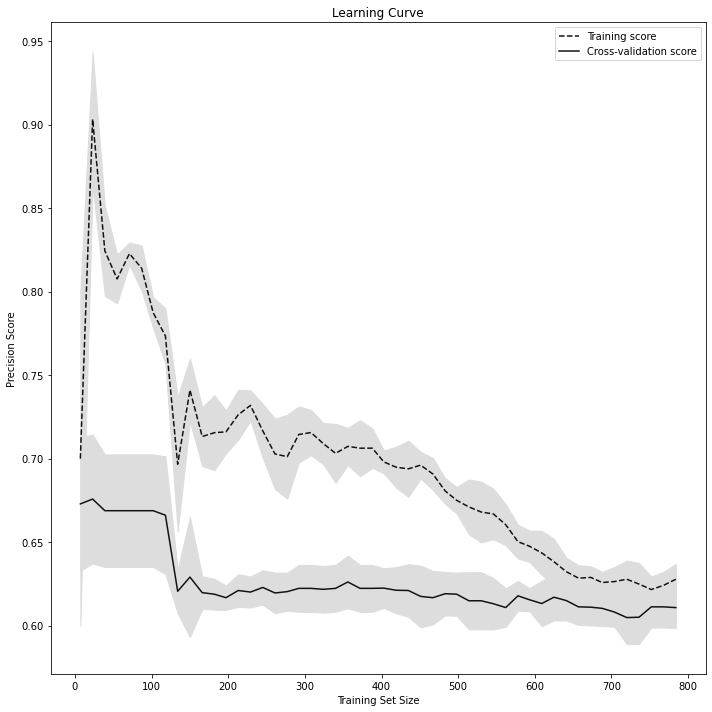

In [156]:



train_sizes,train_scores, test_scores = learning_curve(DecisionTreeClassifier(max_depth=opt["max_depth"]),\
                                                       X[columns_use], y,cv=10,scoring='precision',n_jobs=-1,train_sizes=np.linspace(0.01, 1.0, 50), random_state=int(opt['random_state']))

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.subplots(1, figsize=(10,10))
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Precision Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [145]:
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
from sklearn import tree
import graphviz 

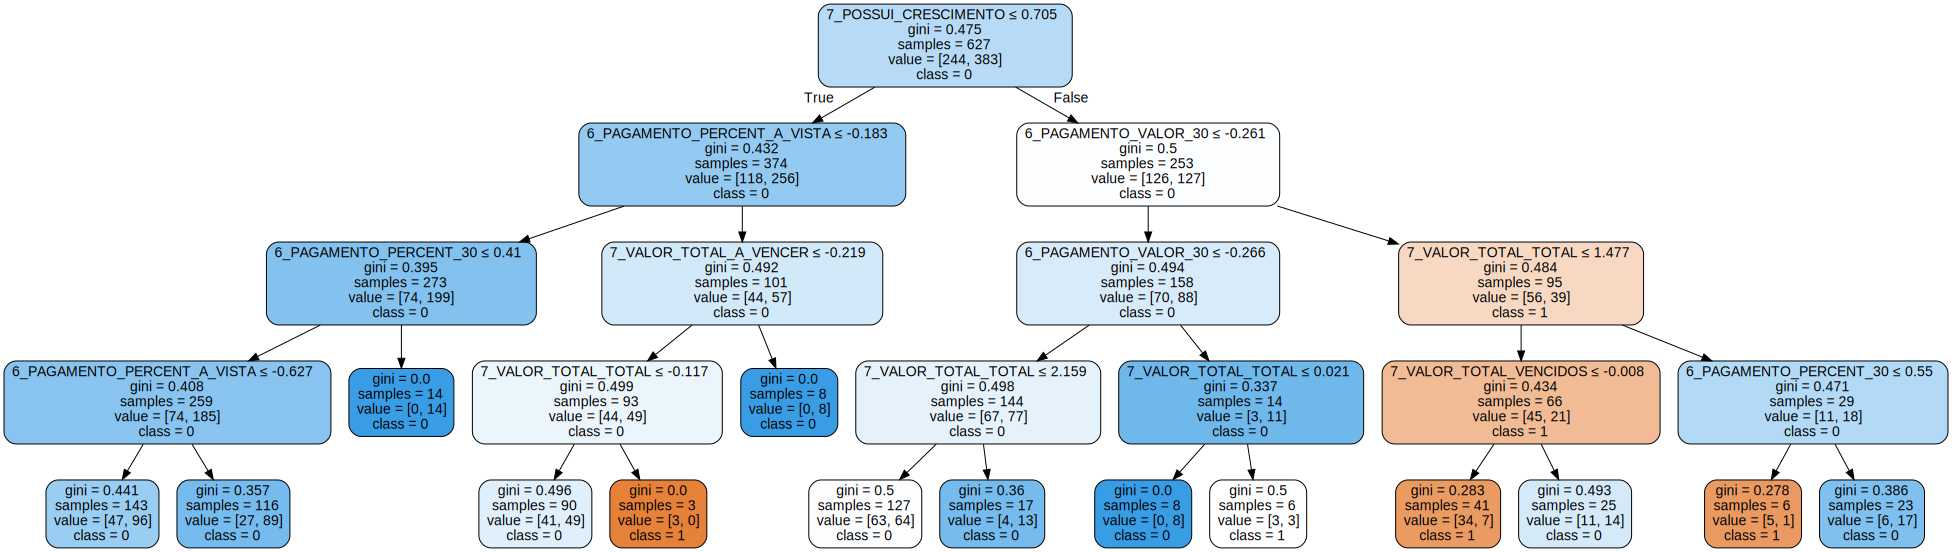

In [146]:
dot_data = tree.export_graphviz(xgb, out_file=None, 
                     feature_names=columns_use,  
                     class_names=['1','0'],
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

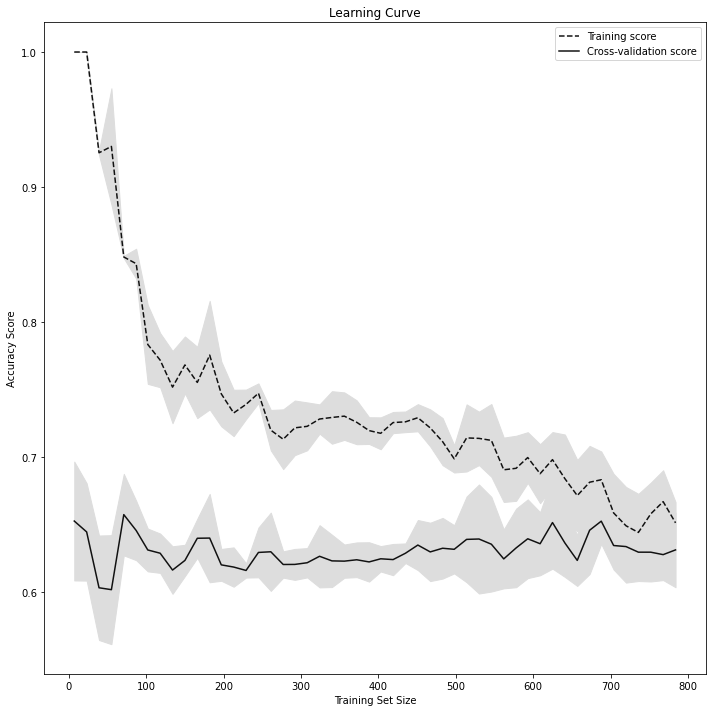

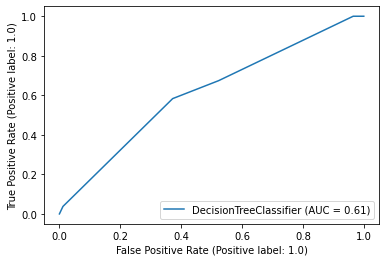

In [113]:
metrics.plot_roc_curve(xgb, X_test, y_test)  
plt.show()   

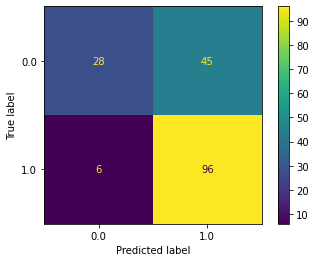

In [288]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

confusion_matrix(y_test, y_result)
plot_confusion_matrix(xgb, X_test, y_test)  
plt.show()  

In [84]:
import shap
shap.initjs()

explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(X_test)


In [97]:

shap.force_plot(explainer.expected_value, np.array(shap_values)[-1, :], X_test.iloc[-1, :])

Exception: In v0.20 force_plot now requires the base value as the first parameter! Try shap.force_plot(explainer.expected_value, shap_values) or for multi-output models try shap.force_plot(explainer.expected_value[0], shap_values[0]).

In [96]:
np.array(shap_values)[-1, :]

array([[ 0.        ,  0.095203  ,  0.        , ...,  0.07742237,
        -0.01432436,  0.01215427],
       [ 0.        ,  0.095203  ,  0.        , ...,  0.07742237,
        -0.01432436,  0.01215427],
       [ 0.        ,  0.07618297,  0.        , ...,  0.00265821,
        -0.01645288,  0.01215427],
       ...,
       [ 0.        ,  0.095203  ,  0.        , ...,  0.07742237,
        -0.01432436,  0.01215427],
       [ 0.        ,  0.02766422,  0.        , ..., -0.09494014,
         0.04184166,  0.04542116],
       [ 0.        ,  0.11300173,  0.        , ..., -0.18794667,
         0.07490289, -0.02643616]])

In [ ]:

train_sizes, train_scores, test_scores = learning_curve(RandomForestClassifier(), X, y, cv=10, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 50))

# PCA

In [128]:
pca = PCA(n_components=12, svd_solver = 'auto')
Principal_components=pca.fit_transform(df_scaled)
pca_df = pd.DataFrame(data = Principal_components, columns = ['PC 1', 'PC 2', 'PC 3', 'PC 4', 'PC 5', 'PC 6', 'PC 7', 'PC 8', 'PC 9', 'PC 10', 'PC 11', 'PC 12'])
# print(pca_df)

In [129]:
for_visual = pd.concat([pca_df, df['result']], axis = 1)

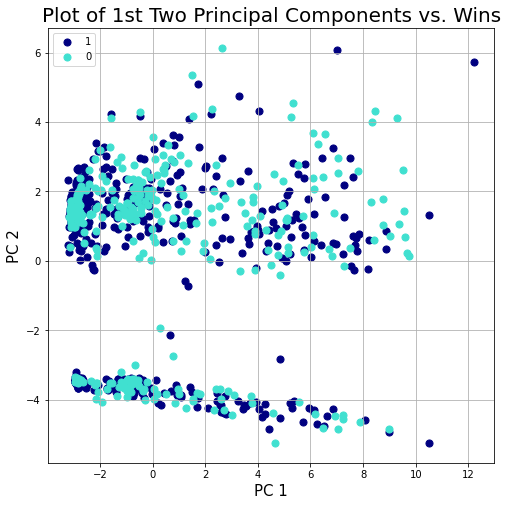

In [130]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC 1', fontsize = 15)
ax.set_ylabel('PC 2', fontsize = 15)
ax.set_title('Plot of 1st Two Principal Components vs. Wins', fontsize = 20)
W_GROUP = [1,0]
colors = ['navy', 'turquoise']
for WINS_GROUP, color in zip(W_GROUP,colors):
    indicesToKeep = for_visual['result'] == WINS_GROUP
    ax.scatter(for_visual.loc[indicesToKeep, 'PC 1']
               , for_visual.loc[indicesToKeep, 'PC 2']
               , c = color
               , s = 50)
ax.legend(W_GROUP)
ax.grid()

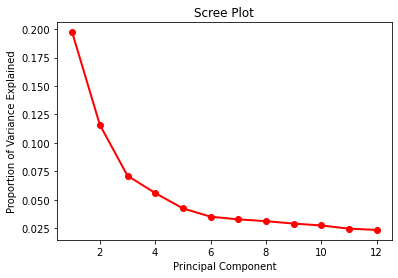

In [131]:

PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

In [132]:
pca.n_components_

12

In [114]:
pca = PCA(n_components=3, svd_solver = 'auto')
pca_model =pca.fit(df_scaled)

In [84]:
X_pca = pd.DataFrame(pca_model.transform(df_scaled))

In [93]:
X_pca['y'] = df['result']

In [94]:
for i1, i2, r in zip(X_pca[0], X_pca[1], X_pca['y']):
    print(i1)

-1.0130148146950748
-2.561533597459243
-2.384852863759594
6.607174936991371
6.411943326021498
-0.49077729967715933
4.902107362407005
-0.17668588686935233
-2.636640165414398
-2.695158885893223
4.040878148609549
3.8591317298509122
1.4476553319668124
1.0508827422097624
-1.1059750765250427
8.373281174476027
7.957507138315545
0.646232274038678
-1.064409821161471
-1.6214851482521284
-2.3204643398180202
-1.6099777342840904
-2.892289580716302
2.475558997279329
-2.88801698390148
7.055288851967157
-2.564221171027219
-2.953256964793484
-2.963083937467575
0.3910236864566606
-1.5383624339295618
-2.904169622277663
-2.8463912677835936
2.736954144889413
-0.7786506906362938
5.769970160760668
-2.723770810098625
-2.703526709588307
-2.579534064544259
-0.4362345108383054
0.08268757858246167
-2.9166669679610178
-1.197946784575827
-2.8115743374987554
-2.7982503216219348
-2.1453908871035554
-2.6002392262534517
2.8388123350126193
4.974771009410296
6.665775425301778
3.4697399949869823
-2.830832346518186
-2.6796

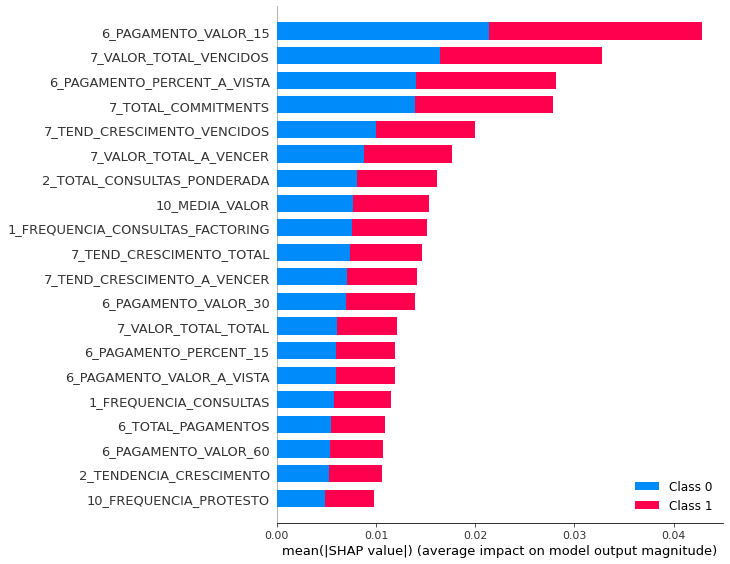